In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\Brazilian Eccomerce Dataset\\product_categories\\pet_shop.csv')

In [5]:
df.head()

,order_purchase_date,product_category_name,price
0,2016-10-04,pet_shop,59.90
1,2016-10-05,pet_shop,94.90
2,2016-10-06,pet_shop,87.75
3,2016-10-07,pet_shop,112.99
4,2016-10-09,pet_shop,541.74


In [6]:
df.tail()

,order_purchase_date,product_category_name,price
540,2018-08-23,pet_shop,189.60
541,2018-08-24,pet_shop,387.70
542,2018-08-26,pet_shop,60.00
543,2018-08-27,pet_shop,187.79
544,2018-08-28,pet_shop,177.68


In [7]:
df.dtypes

order_purchase_date       object
product_category_name     object
price                    float64
dtype: object

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.shape

(545, 3)

In [10]:
df = df[['order_purchase_date','price']]

In [11]:
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,2016-10-04,59.90
1,2016-10-05,94.90
2,2016-10-06,87.75
3,2016-10-07,112.99
4,2016-10-09,541.74


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,2016-10-04,59.90
1,2016-10-05,94.90
2,2016-10-06,87.75
3,2016-10-07,112.99
4,2016-10-09,541.74


In [14]:
df.shape

(545, 2)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.reset_index()

,index,Month,Sales
0,0,2016-10-04,59.90
1,1,2016-10-05,94.90
2,2,2016-10-06,87.75
3,3,2016-10-07,112.99
4,4,2016-10-09,541.74
...,...,...,...
540,540,2018-08-23,189.60
541,541,2018-08-24,387.70
542,542,2018-08-26,60.00
543,543,2018-08-27,187.79


In [17]:
df.describe()

,Sales
count,545.000000
mean,393.239284
std,386.320520
min,11.990000
25%,132.630000
50%,269.980000
75%,525.870000
max,2936.860000


In [20]:
df.set_index('Month',inplace=True)

<AxesSubplot:>

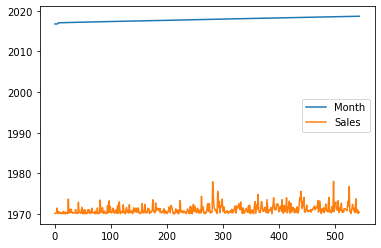

In [21]:
df.reset_index('Month',inplace=True)
df.plot()

In [22]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [23]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [24]:
test_result=adfuller(df['Sales'])

In [25]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [26]:
adfuller_test(df['Sales'])

ADF Test Statistic : -6.8494199988762725
p-value : 1.7093861573093565e-09
#Lags Used : 5
Number of Observations Used : 539
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


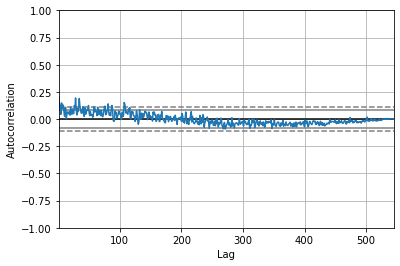

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm
import statsmodels.api as sm

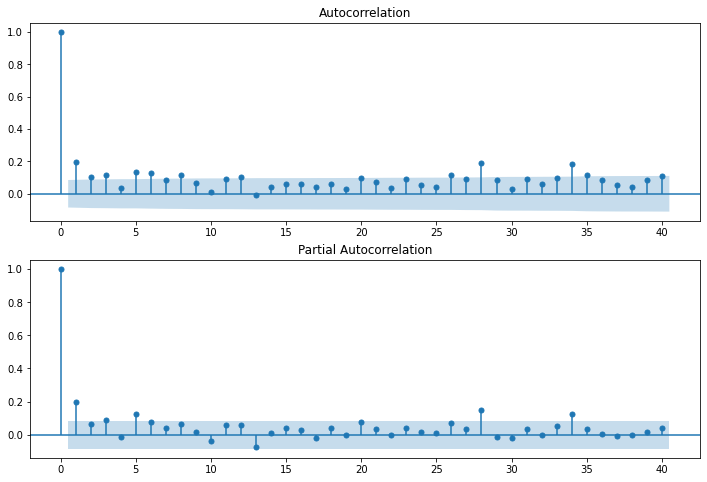

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].iloc[13:],lags=40,ax=ax2)

In [30]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Ajit Wagh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  544
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3983.411
Method:                       css-mle   S.D. of innovations            364.292
Date:                Mon, 17 May 2021   AIC                           7974.822
Time:                        13:54:59   BIC                           7992.018
Sample:                             1   HQIC                          7981.545
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7655      0.113      6.773      0.000       0.544       0.987
ar.L1.D.Sales     0.1231      0.043      2.889      0.004       0.040       0.207
ma.L1.D.Sales    -1.0000      0.005   -186.128      0.000      -1.011      -0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.1214           +0.0000j            8.1214            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

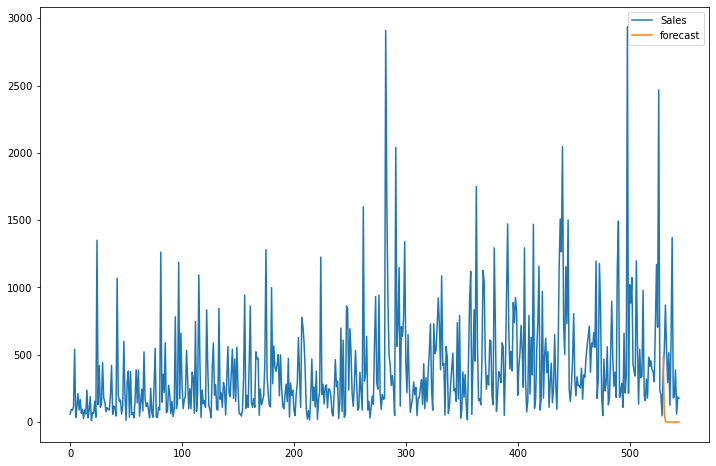

In [33]:
df['forecast']=model_fit.predict(start=530,end=544,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [34]:
df['forecast'].tail()

540    0.765483
541    0.765482
542    0.765482
543    0.765482
544    0.765482
Name: forecast, dtype: float64

In [35]:
df.head()

,Month,Sales,forecast
0,2016-10-04,59.90,NaN
1,2016-10-05,94.90,NaN
2,2016-10-06,87.75,NaN
3,2016-10-07,112.99,NaN
4,2016-10-09,541.74,NaN


In [36]:
import statsmodels.api as sm

In [37]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

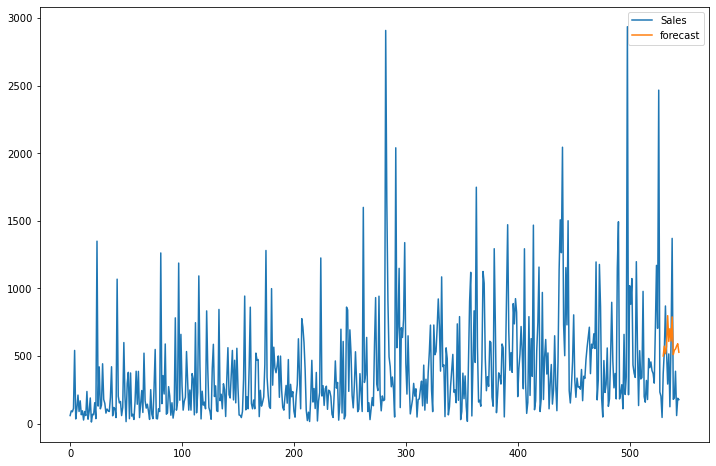

In [38]:
df['forecast']=results.predict(start=530,end=545,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,forecast))

NameError: name 'test' is not defined